In [ ]:
#BEZIER
import numpy as np

def bezier_curve_2d(control_points, t):
    """
    control_points: list or numpy array of 2D control points
    t: parameter value between 0 and 1
    """
    n = len(control_points) - 1  # Degree of the curve
    result = np.zeros(2)
    
    for i in range(n + 1):
        binomial_coefficient = np.math.comb(n, i)
        bezier_basis = binomial_coefficient * (t ** i) * ((1 - t) ** (n - i))
        result += control_points[i] * bezier_basis
    
    return result

control_points_2d = np.array([[1, 1], [2, 3/2], [5/2, 1/2]])
t = 0.9
result_2d = bezier_curve_2d(control_points_2d, t)
print("The point on the Bezier curve at t =", t, "is", result_2d)

#testing:
p = np.poly1d([-1/2,2,1])
q = np.poly1d([-3/2,1,1])
print(p(t),"***",q(t))

The point on the Bezier curve at t = 0.9 is [2.395 0.685]
2.395 *** 0.6849999999999998


In [ ]:
#LAGRANGE
def lagrange_poly(x_data, i, x):
    '''
    Evaluation of l_i(x) where x_data are the data points
    '''
    assert(i < len(x_data)), i
    p = 1
    for j in range(len(x_data)):
        if j == i:
            continue
        p *= (x-x_data[j])/(x_data[i]-x_data[j])
    return p

def interpol_lagrange(x_data, y_data, x):
    '''
        Returns the value of P_n at x, computed with Lagrange's method
    '''
    s = 0
    for i in range(len(x_data)):
        s += lagrange_poly(x_data, i, x)*y_data[i]
    return s

X = np.array([1,2,3,4])
Y = np.array([6,7,4,9])
x = 0.5
print(interpol_lagrange(X,Y, 4))

9.0


x*((0.43333333*x - 2.8)*(x - 2.0) + 5.5) - 10.0
0.43333333*x**3 - 3.6666667*x**2 + 11.1*x - 10.0


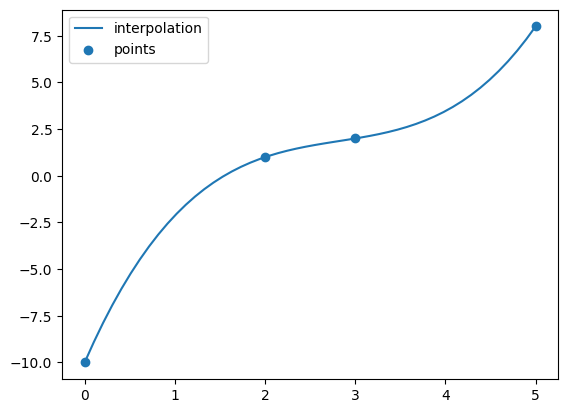

In [ ]:
#NEWTON INTERPOLATION
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from sympy.polys.polyfuncs import horner

def coeffts(x_data, y_data):
    # n points
    n = len(x_data)  # degre n-1
    a = np.zeros((n, n))
    a[:, 0] = y_data.copy()
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i, j] = (a[i, j-1]-a[i-1, j-1])/(x_data[i]-x_data[i-j])
    return a

def nested_newton(x, a, x_data):
    n = len(x_data) - 1
    p = a[n]
    for k in range(1, n+1):
        p = a[n-k] + (x - x_data[n-k])*p
    return p

x_data = np.array([0, 2, 3, 5])  # Example x data points
y_data = np.array([-10, 1, 2, 8])  # Example y data points
a = coeffts(x_data,y_data)

x = sp.symbols("x")
p = sp.N(nested_newton(x, np.diag(a), x_data), 8)
print(p)
print(sp.expand(p))

X = np.linspace(0,5,50)
Y = [p.subs(x,i) for i in X]
plt.plot(X,Y)
plt.scatter(x_data,y_data)
plt.legend(("interpolation","points"))

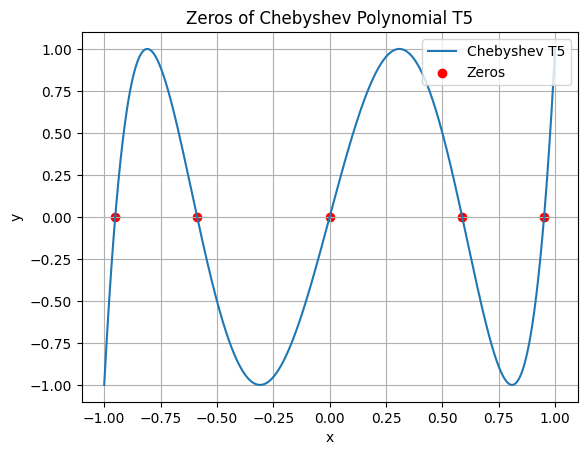

array([ 9.51056516e-01,  5.87785252e-01,  6.12323400e-17, -5.87785252e-01,
       -9.51056516e-01])

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import chebyt

def plot_chebyshev_zeros(n):
    """
    n: order of the Chebyshev polynomial
    """
    x = np.linspace(-1, 1, 1000)
    y = chebyt(n)(x)

    zeros = np.roots(chebyt(n))
    plt.plot(x, y, label=f"Chebyshev T{int(n)}")
    plt.scatter(zeros, np.zeros_like(zeros), color='red', label='Zeros')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title(f"Zeros of Chebyshev Polynomial T{int(n)}")
    plt.show()

# Example usage
order = 5 # Order of the Chebyshev polynomial
plot_chebyshev_zeros(order)


#Rudimentary zeros of chebyshev: 
def cheby_zeros(a,b,n):
  #Zeros of U_{n+1} (n+1 zeros)
  return np.array([((a+b)/2 + ((b-a)/2)*np.cos((2*i+1)*np.pi/(2*n))) for i in range(n)])

cheby_zeros(-1,1,5)

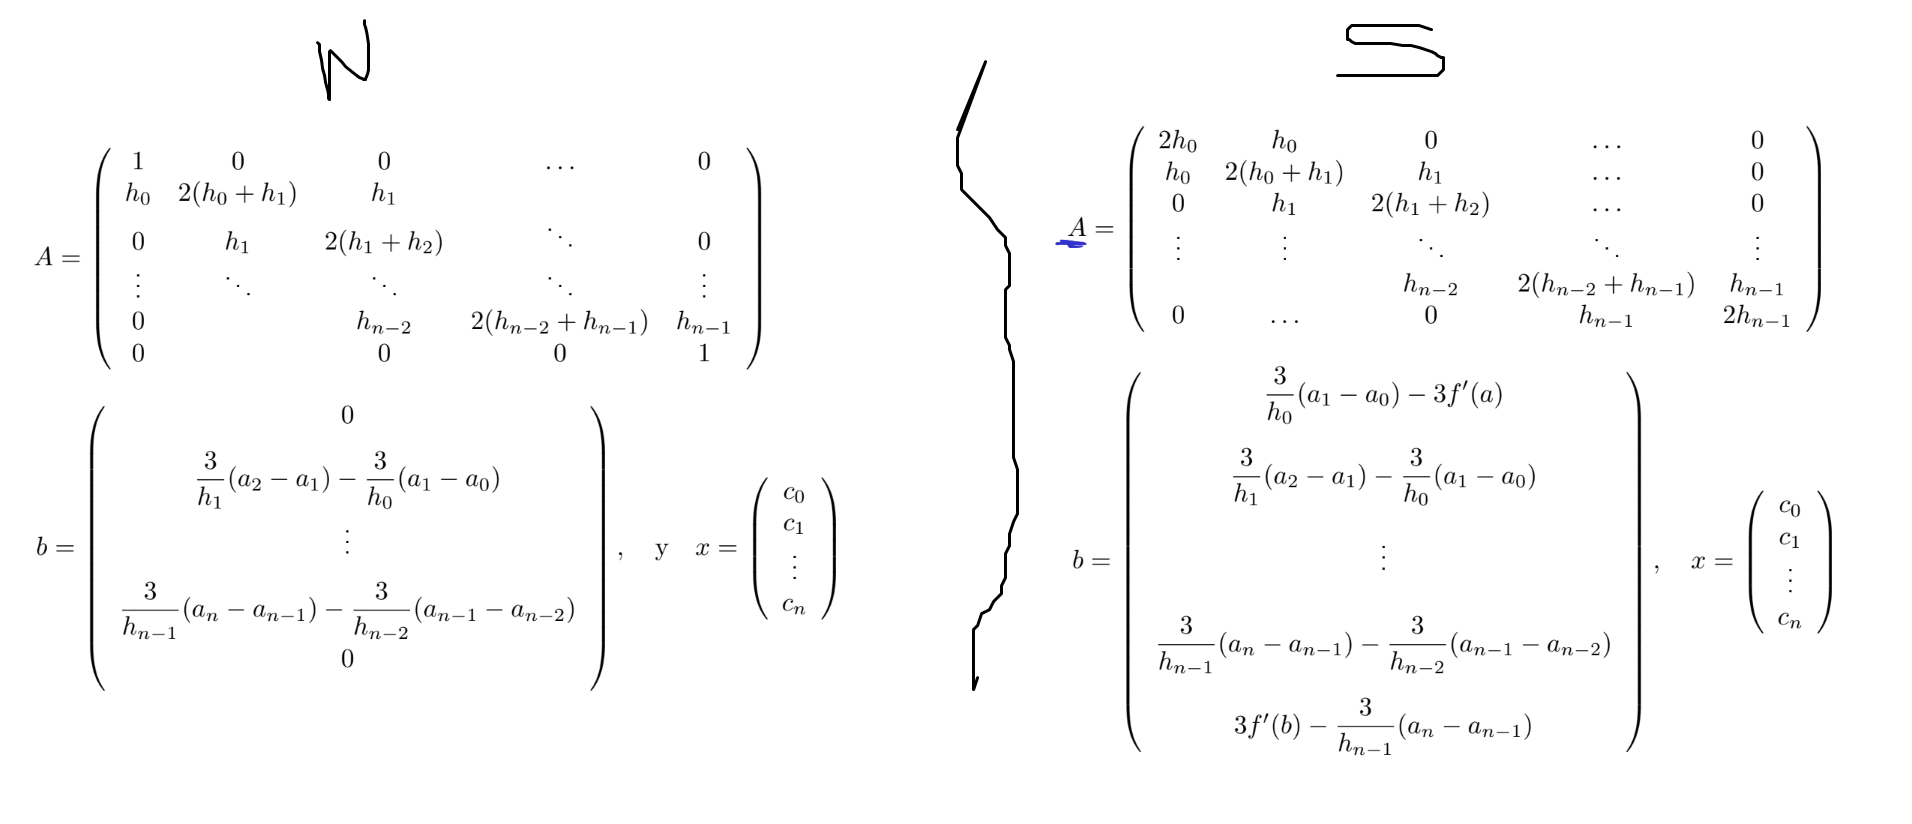